# 01 - FastDup

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb)

This notebook shows how to quickly analyze an image dataset for potential issues using fastdup. We'll take you on a high level tour showcasing the core functions of fastdup in the shortest time.

By the end of this notebook you will learn how to find out if your dataset has issues such as:

+ Broken images.
+ Duplicates/near-duplicates.
+ Outliers.
+ Dark/bright/blurry images.

We'll also visualize clusters of visually similar looking images to let you have a birds eye view on your dataset.

## Installation

If you're new, we encourage you to run the notebook in [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb) or [Kaggle](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/quick-dataset-analysis.ipynb) for the best experience. If you'd like to just view and skim through the notebook, we recommend viewing using [nbviewer](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb).  

Let's start with the installation:

In [1]:
!pip install fastdup -Uq

Now, test the installation by printing out the version. If there's no error message, we are ready to go!

In [2]:
import fastdup
fastdup.__version__

'1.111'

## Download Dataset

For demonstration, we will use a widely available and well curated dataset [Oxford IIIT Pet dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). For that reason we might not find a lot of issues here but feel free to swap this dataset with your own.

The dataset consists of images and annotations for 37 category pet with roughly 200 images for each class. For now, we are only interested in finding issues in the images and not the annotations. More on annotations in the upcoming [notebook](./analyzing-image-classification-dataset.ipynb).

Let's download only from the dataset and extract them into the local directory:

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O images.tar.gz
!tar xf images.tar.gz

## Run fastdup

Once the extraction completes, we can run fastdup on the images.

For that let's create a `fastdup` object and specify the input directory which points to the folder of images.

In [4]:
!ls data

features.npy  images  pred_probs.npy


In [6]:
fd = fastdup.create(input_dir="data/images/", work_dir='fastdup_oxford_pets3t')

The `.create` method also has an optional `work_dir` parameter which specifies the directory to store artifacts from the run.

You can optionally run `fastdup.create(work_dir="my_work_dir/", input_dir="images/")` if you'd like to store the artifacts in a specific working directory.

In [7]:
fd.run()

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2024-03-18 16:51:01 [INFO] Going to loop over dir data/images
2024-03-18 16:51:01 [INFO] Found total 7390 images to run on, 7390 train, 0 test, name list 7390, counter 7390 
2024-03-18 16:51:01 [WARNING] Failed to read image data/images/Abyssinian_34.jpg
2024-03-18 16:51:04 [WARNING] Failed to read image data/images/Egyptian_Mau_139.jpg
2024-03-18 16:51:04 [WARNING] Failed to read image data/images/Egyptian_Mau_145.jpg
2024-03-18 16:51:04 [WARNING] Failed to read image data/images/Egyptian_Mau_167.jpg
2024-03-18 16:51:04 [WARNING] Failed to read image data/images/Egyptian_Mau_177.jpg
2024-03-18 16:51:04 [WARNING] Failed to read image data/images/Egyptian_Mau_191.jpg
2024-03-18 16:51:11 [INFO] Found total 7390 images to run ontimated: 0 Minutes
Finished histogram 1.943
Finished bucket sort 1.965
2024-03-18 16:51:11 [INFO] 138) Finished write_index() NN model
2024-03-18 16:51:11 [INFO] Stored nn model index file f

0

## View Run Summary

In [8]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 7390 images
    Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Components:  failed to find images clustered into components, try to run with lower cc_threshold.
    Outliers: 6.14% (454) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 7390 images',
 'Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data',
 'For a detailed analysis, use `.invalid_instances()`.\n',
 'Components:  failed to find images clustered into components, try to run with lower cc_threshold.',
 'Outliers: 6.14% (454) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

## Invalid Images
From the logs printed above, we see there are a few invalid images. These are broken images that cannot be read.

You can get a list of broken images with:

In [9]:
fd.invalid_instances()

,filename,index,error_code,is_valid,fd_index
135,data/images/Abyssinian_34.jpg,135,ERROR_CORRUPT_IMAGE,False,135
2240,data/images/Egyptian_Mau_139.jpg,2240,ERROR_CORRUPT_IMAGE,False,2240
2247,data/images/Egyptian_Mau_145.jpg,2247,ERROR_CORRUPT_IMAGE,False,2247
2268,data/images/Egyptian_Mau_167.jpg,2268,ERROR_CORRUPT_IMAGE,False,2268
2278,data/images/Egyptian_Mau_177.jpg,2278,ERROR_CORRUPT_IMAGE,False,2278
2293,data/images/Egyptian_Mau_191.jpg,2293,ERROR_CORRUPT_IMAGE,False,2293


## Duplicate/Near-duplicates

One of the lowest hanging fruits in cleaning a dataset is finding and eliminating duplicates.

fastdup provides a handy way of visualizing duplicates/near-duplicates using the `duplicates_gallery` method. The `Distance` value indicates how visually similar are the image pairs in the gallery. A `Distance` of `1.0` indicates an exact copy and vice-versa.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored similarity visual view in  fastdup_oxford_pets3t/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



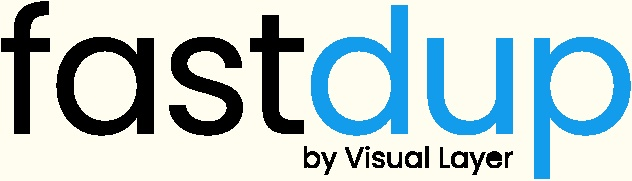
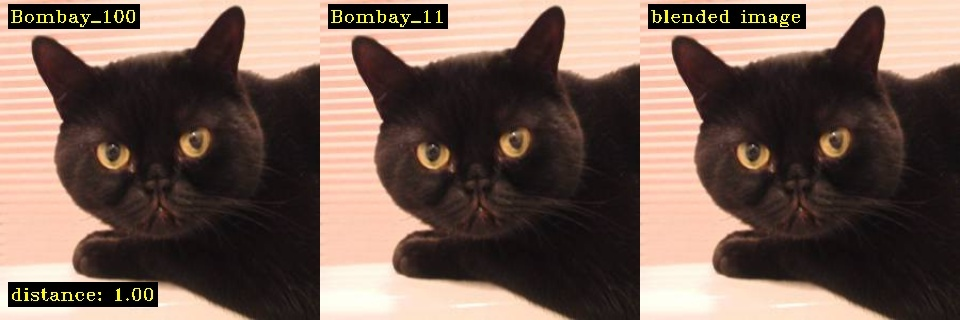
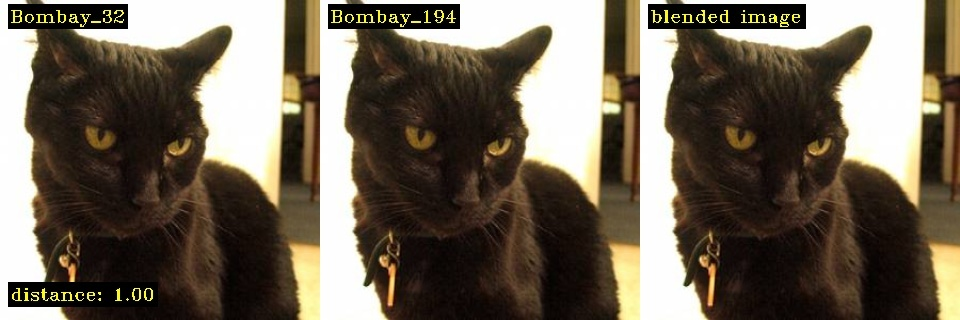
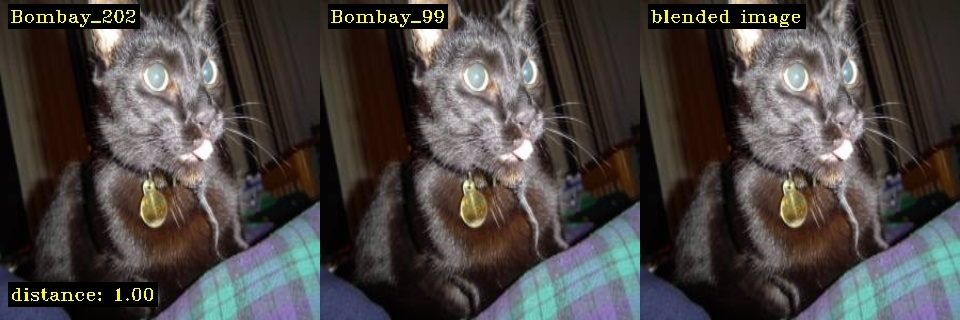
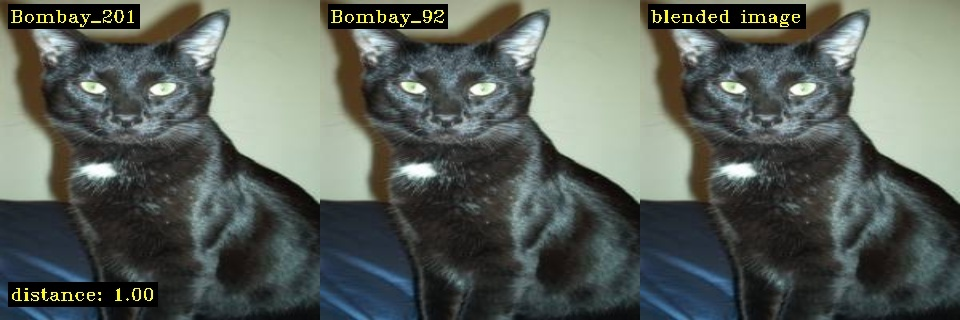
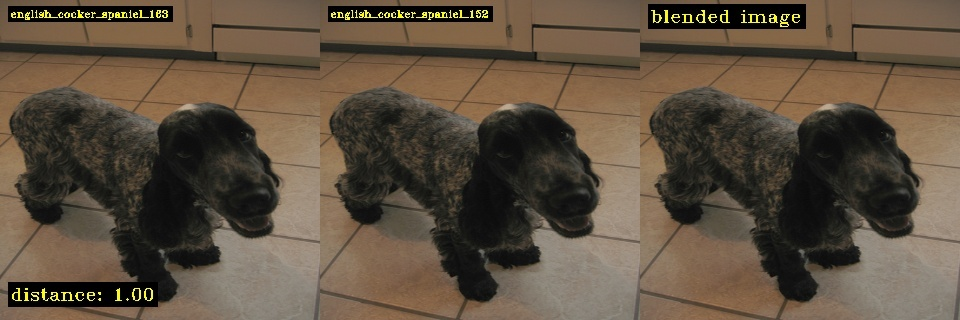

0

In [16]:
fd.vis.duplicates_gallery(num_images=5)

## Outliers

Similar to duplicate pairs, you can visualize potential outliers in your dataset with:

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored outliers visual view in  fastdup_oxford_pets3t/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



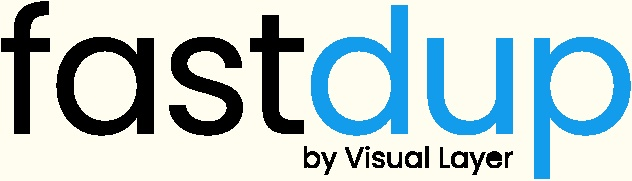
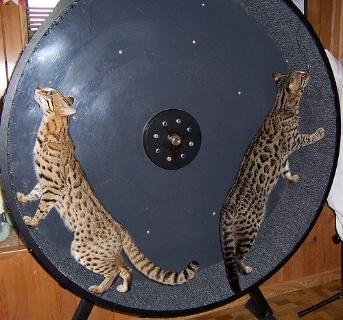
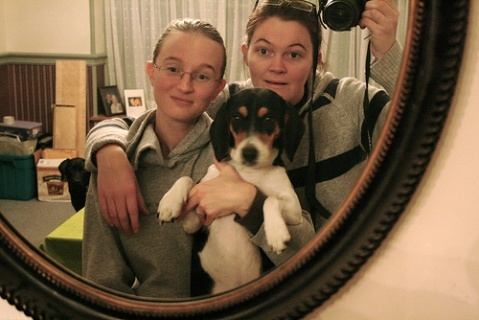
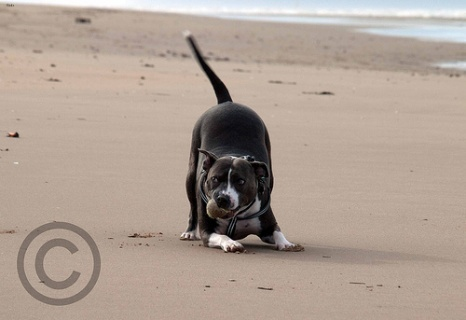
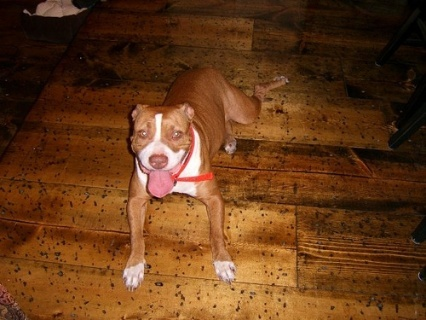
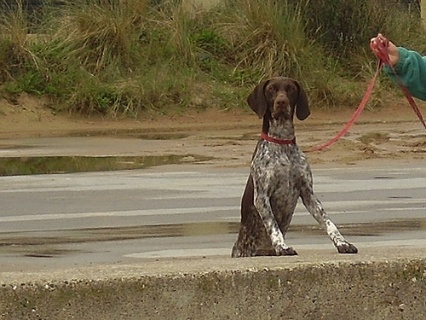

0

In [17]:
fd.vis.outliers_gallery(num_images=5) 

## Dark, Bright and Blurry Images

fastdup also lets you visualize images from your dataset using statistical metrics.

For example, with `metric='dark'` we can visualize the darkest images from the dataset.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  fastdup_oxford_pets3t/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



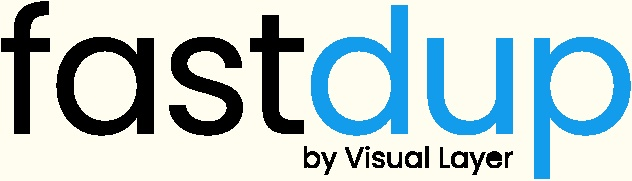
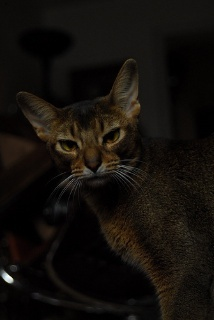
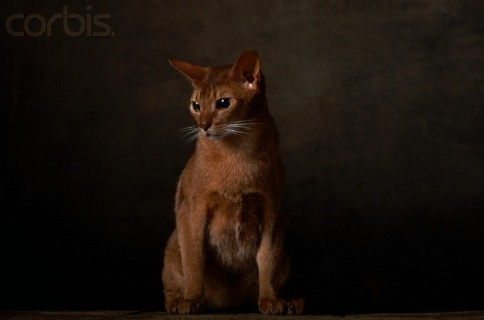
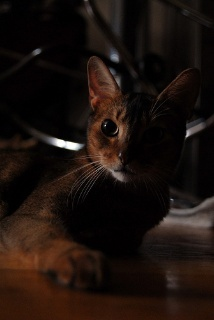
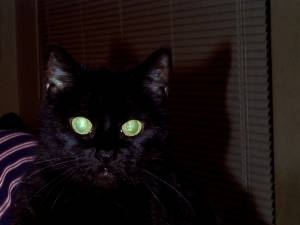
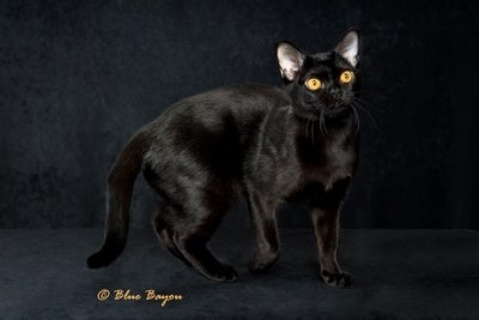

0

In [18]:
fd.vis.stats_gallery(metric='dark', num_images=5)

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  fastdup_oxford_pets3t/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



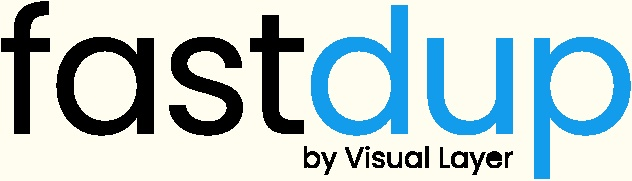
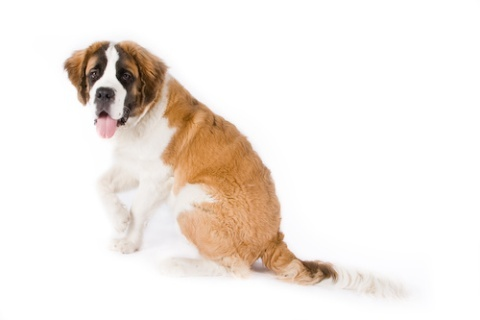
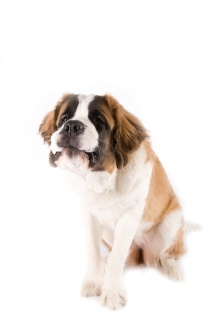
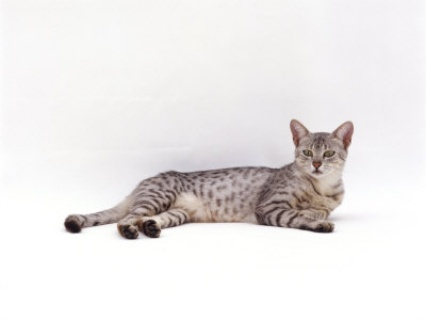
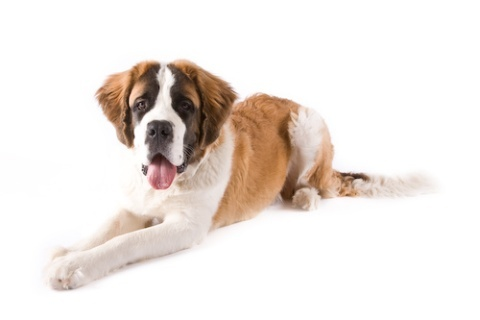
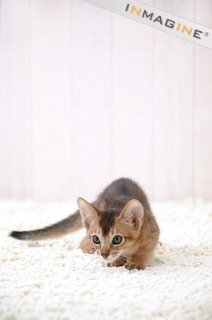

0

In [19]:
fd.vis.stats_gallery(metric='bright', num_images=5)

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored blur visual view in  fastdup_oxford_pets3t/galleries/blur.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



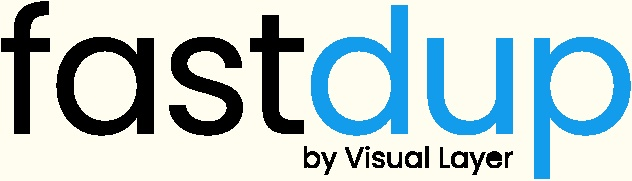
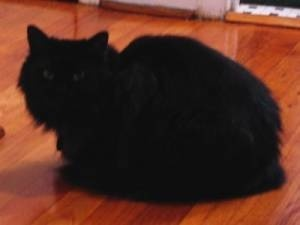
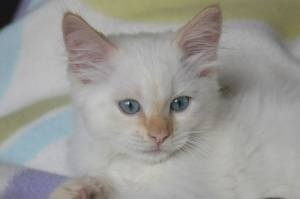
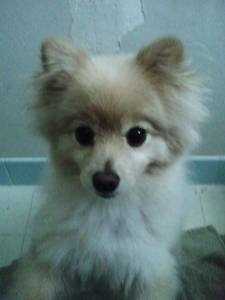
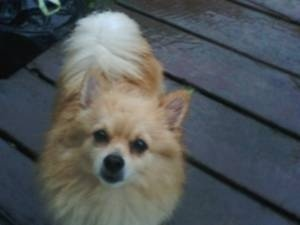
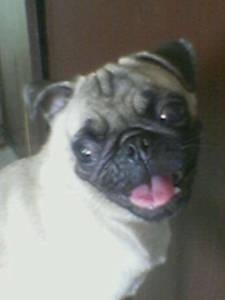

0

In [20]:
fd.vis.stats_gallery(metric='blur', num_images=5)

## Image Clusters

One of fastdup's coolest feature is visualizing image clusters. In the previous section we saw how to visualize similar image pairs. In this section we group similar looking image (or even duplicates) as a cluster and visualize them in gallery.

To do so, simply run:



> **Note**: fastdup uses default parameter values when creating image clusters. Depending on your data and use case, the best value may vary. Read more [here](https://visual-layer.readme.io/docs/dataset-cleanup) on how to change parameter values to cluster images.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Finished OK. Components are stored as image files fastdup_oxford_pets3t/galleries/components_[index].jpg
Stored components visual view in  fastdup_oxford_pets3t/galleries/components.html
Execution time in seconds 0.5
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



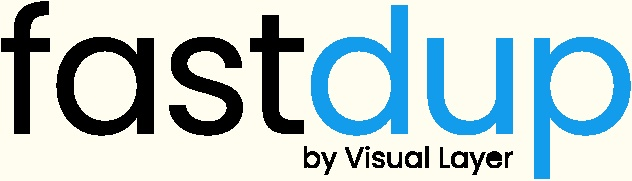
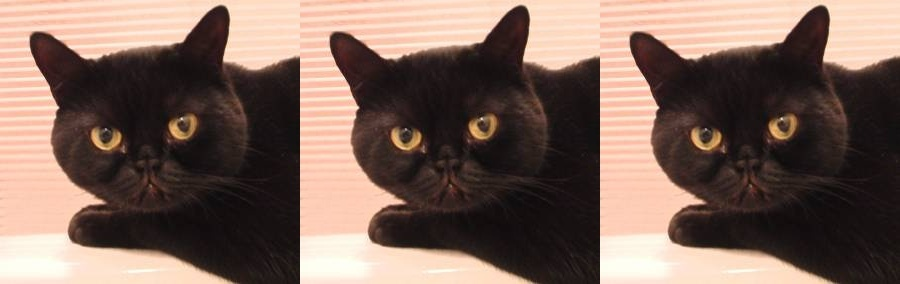
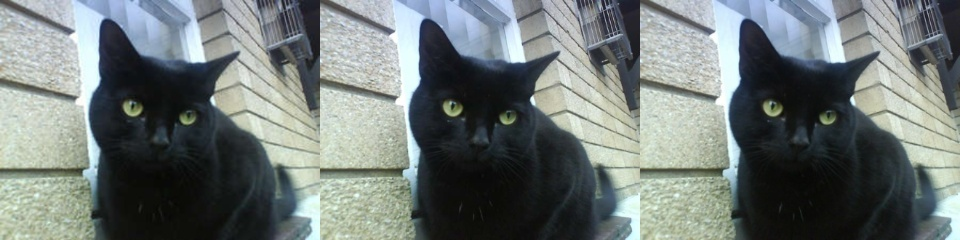
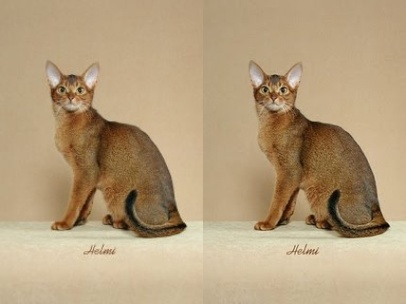
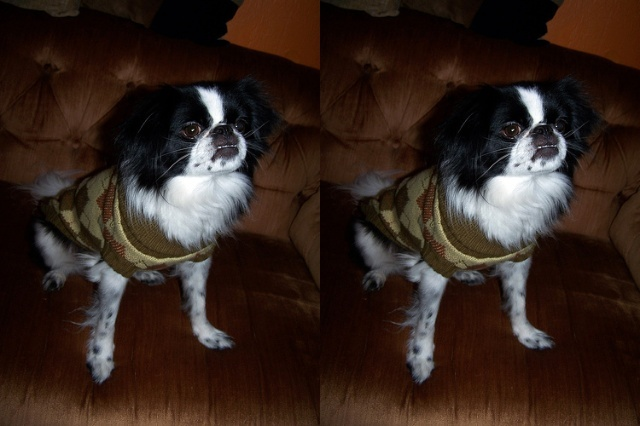
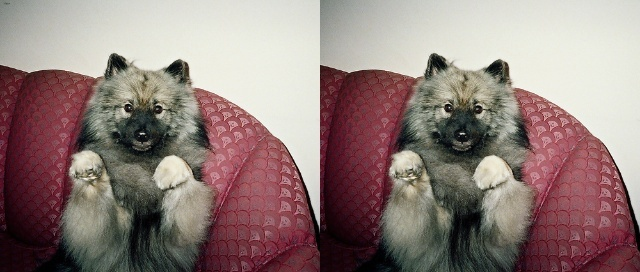

0

In [21]:
fd.vis.component_gallery(num_images=5)

## Wrap Up

That's a wrap! In this notebook we showed how you can run fastdup on a dataset or any folder of images. 

We've seen how to use fastdup to find:

+ Broken images.
+ Duplicate/near-duplicates.
+ Outliers.
+ Dark, bright and blurry images.
+ Image clusters.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 
